# Explanatory Data Analysis

In [2]:
# Imports
# %pip install pandas numpy matplotlib seaborn
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

In [3]:
# Load Dataset
df = pd.read_csv('C:/Users/abdou/Documents/Data_Science_Projects/AbdoulT_DSPortfolio/Credit Risk Modeling Projects/Credit Default Prediction Using Logistic Regression and XGBoost/data/UCI_Credit_Card.csv', header=0)
df.rename(columns={'default payment next month': 'default'}, inplace=True)

In [4]:
# Quick Overview
print(df.shape)
print(df.dtypes)
df.head()

(30000, 25)
ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
# Check for Missing Values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

Missing values:
 Series([], dtype: int64)


In [6]:
# Rename Columns (Optional cleanup)
df.columns = [col.lower().replace(" ", "_") for col in df.columns]
df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)  # Match naming pattern

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns   

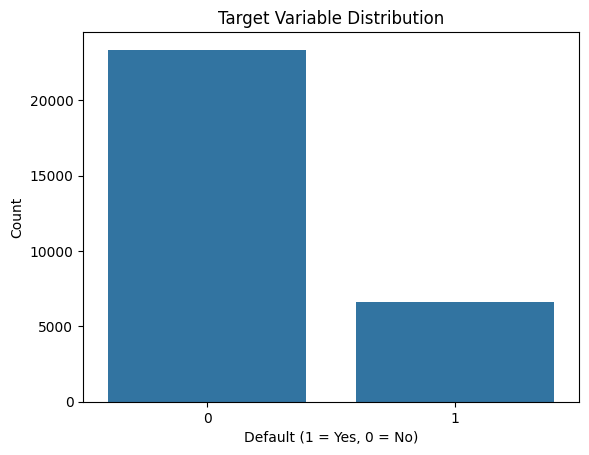

In [9]:
# Target Variable Distribution
sns.countplot(x='default.payment.next.month', data=df)
plt.title("Target Variable Distribution")
plt.xlabel("Default (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

In [10]:
# Summary Statistics
df.describe()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


   id  limit_bal  sex  education  marriage  age  pay_0  pay_2  pay_3  pay_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  bill_amt4  bill_amt5  bill_amt6  pay_amt1  pay_amt2  pay_amt3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   pay_amt4  pay_amt5  pay_amt6  default.payment.next.month  
0       0.0       0.0   

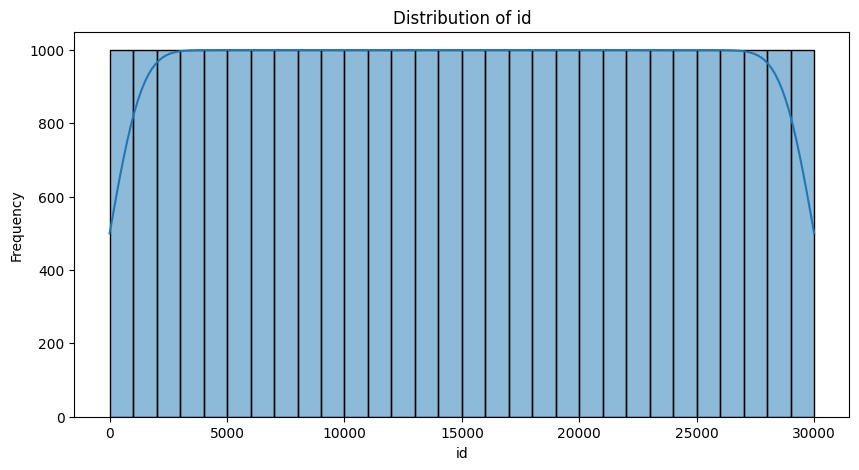

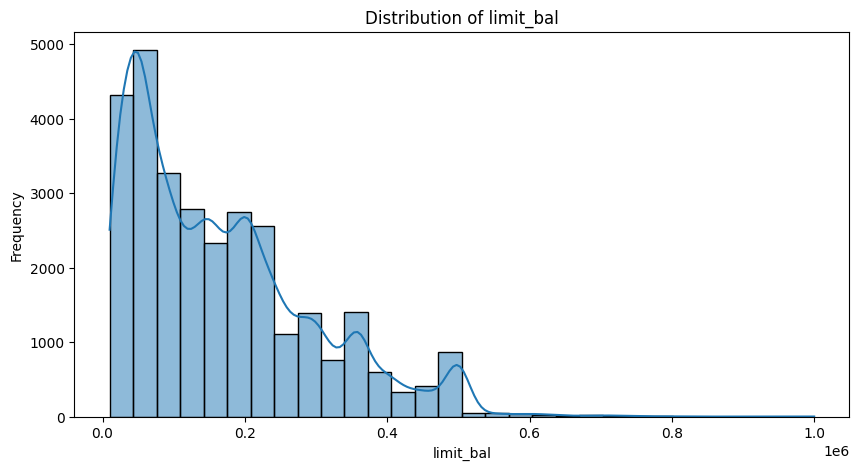

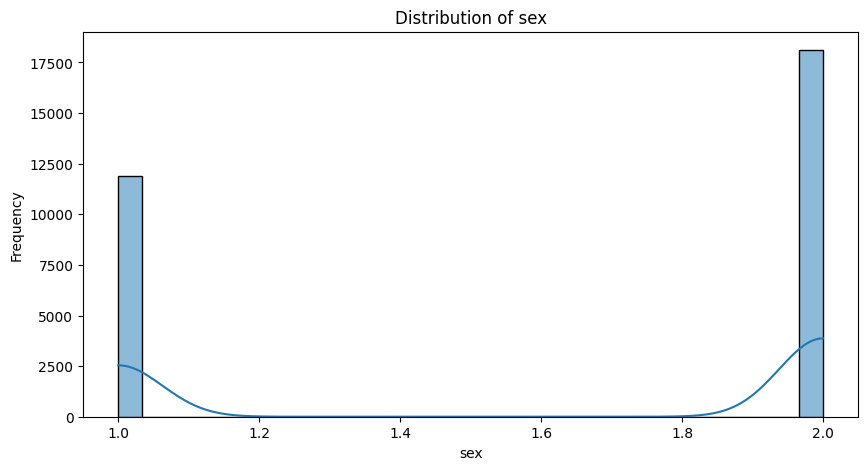

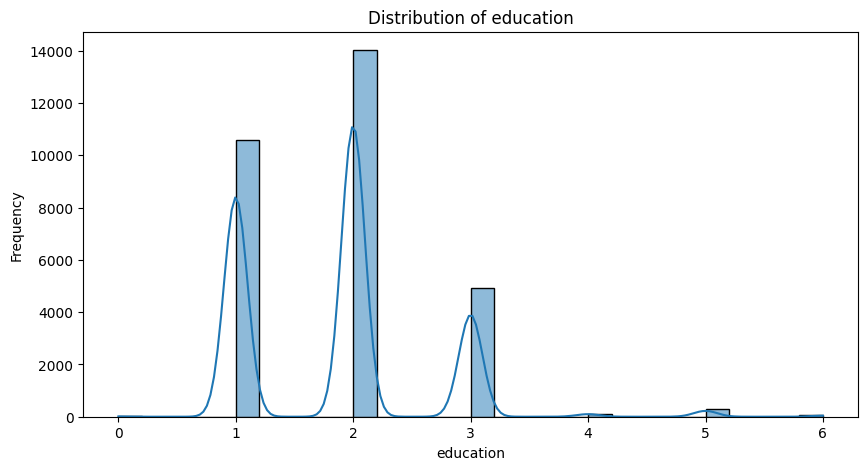

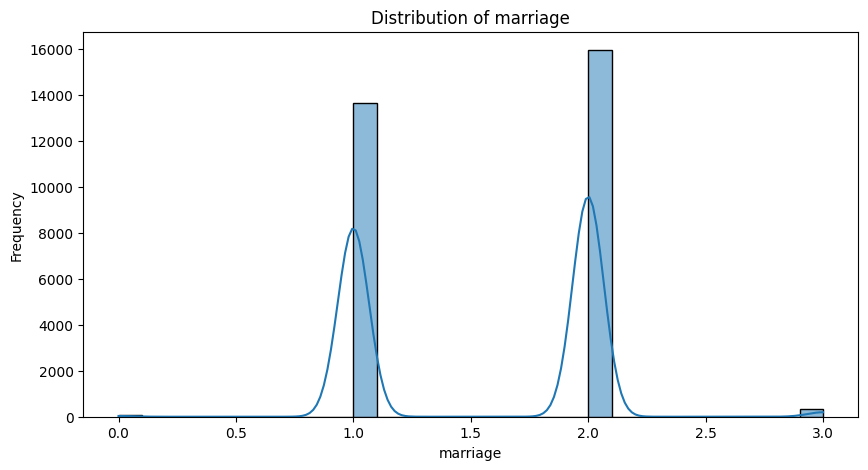

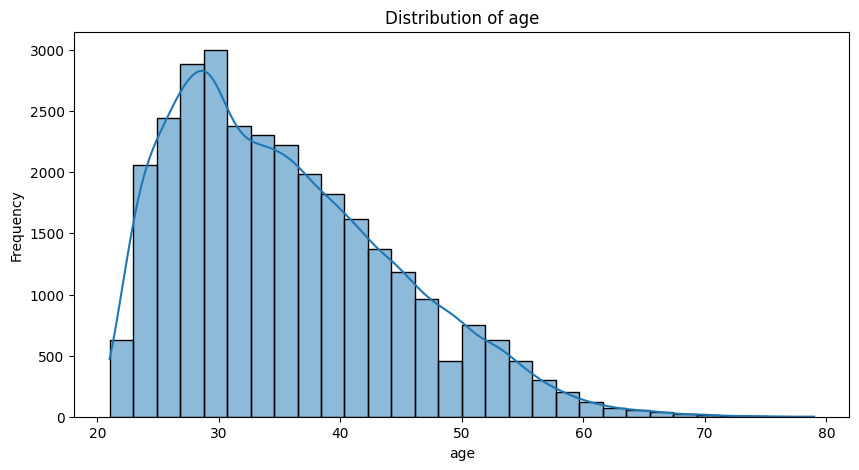

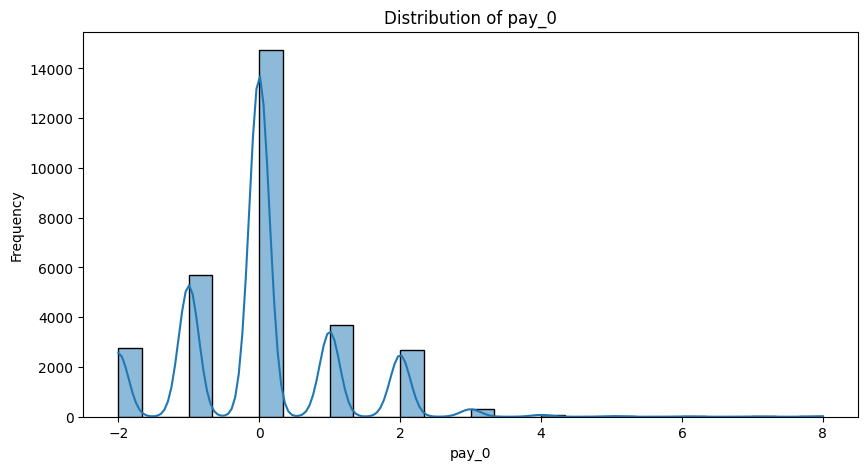

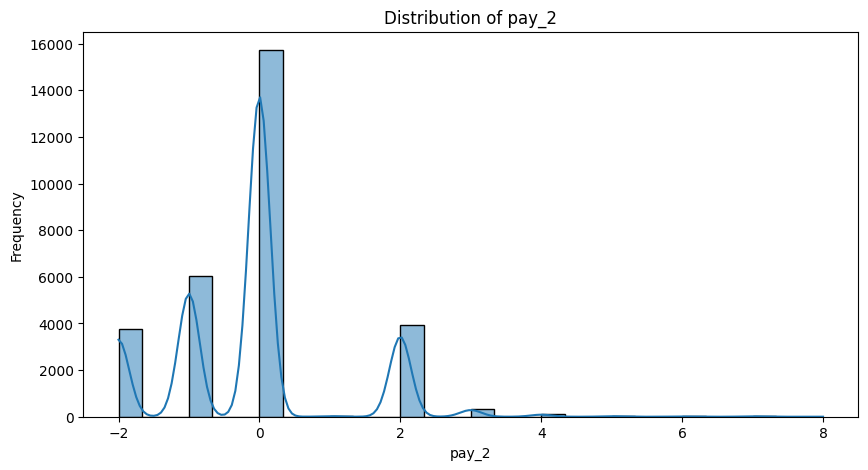

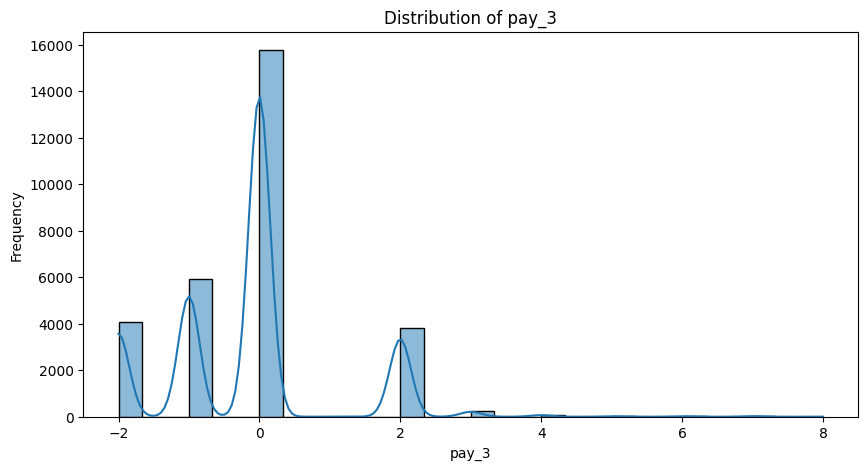

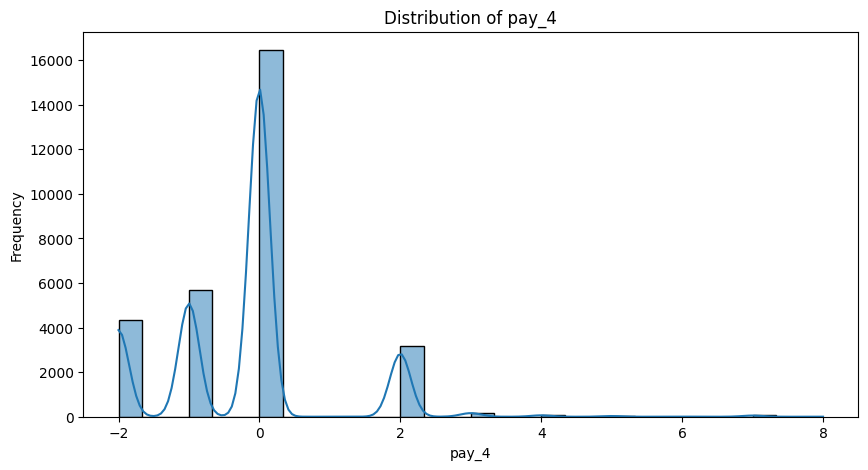

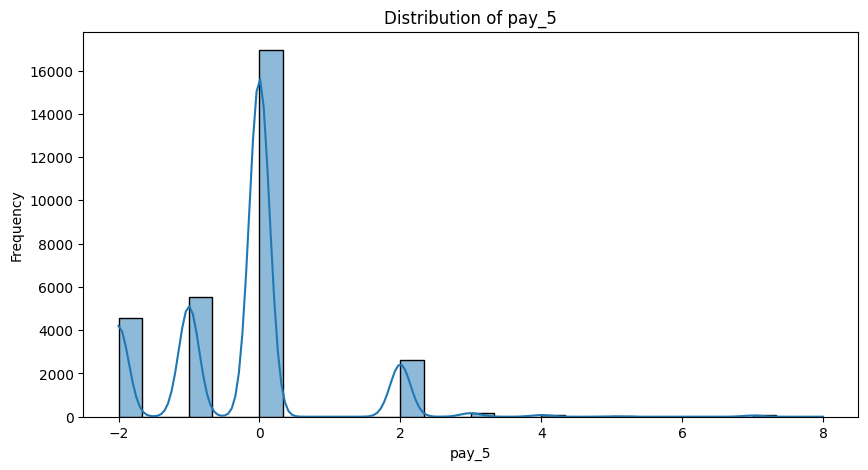

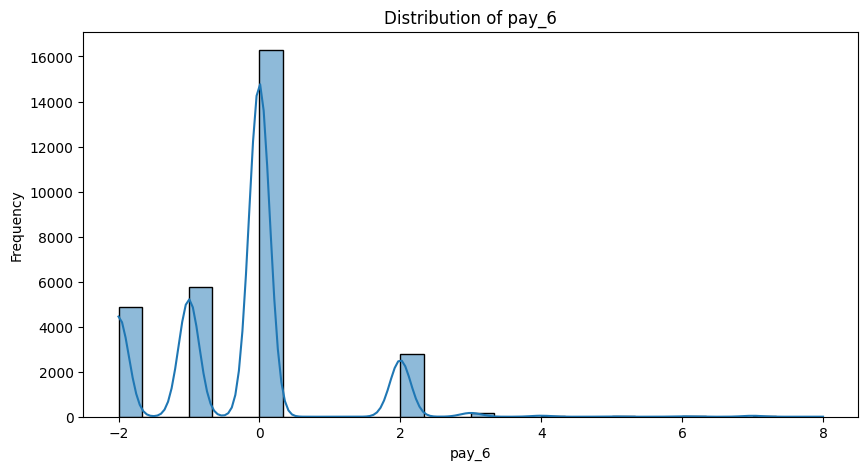

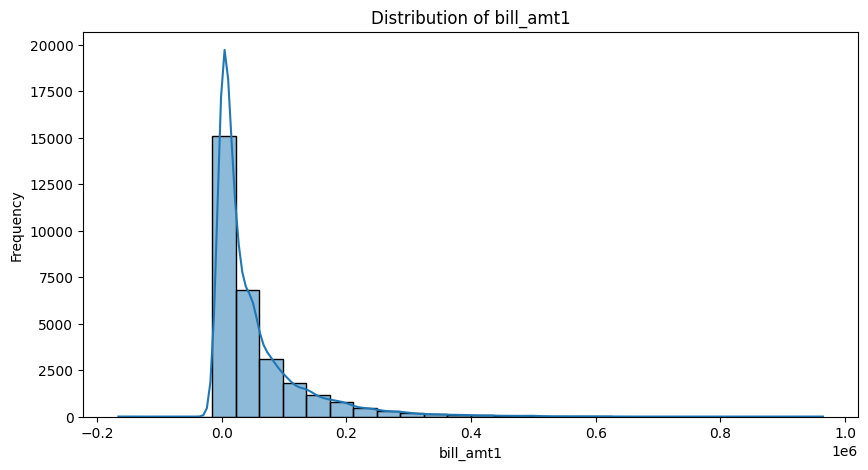

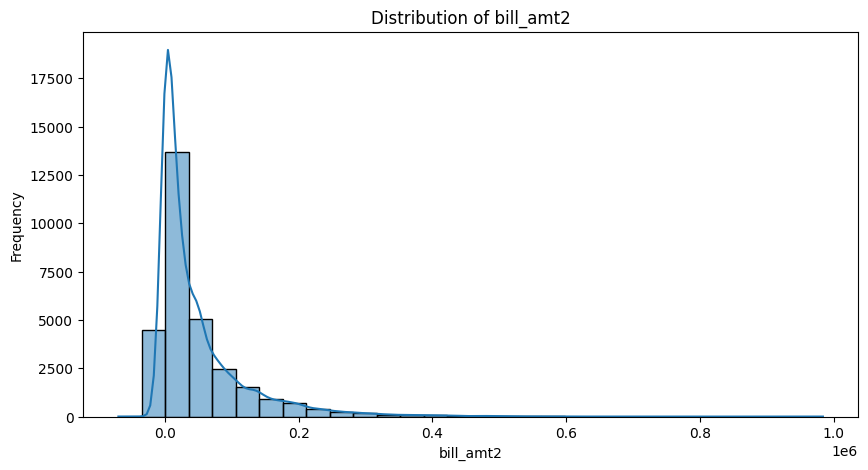

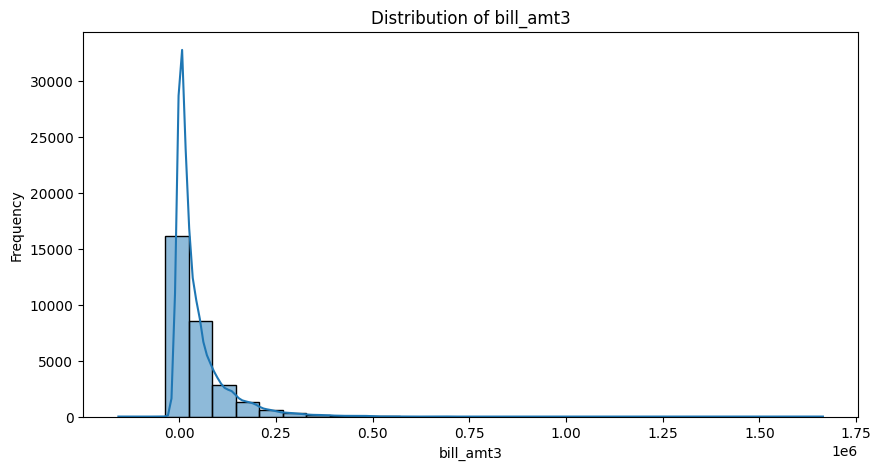

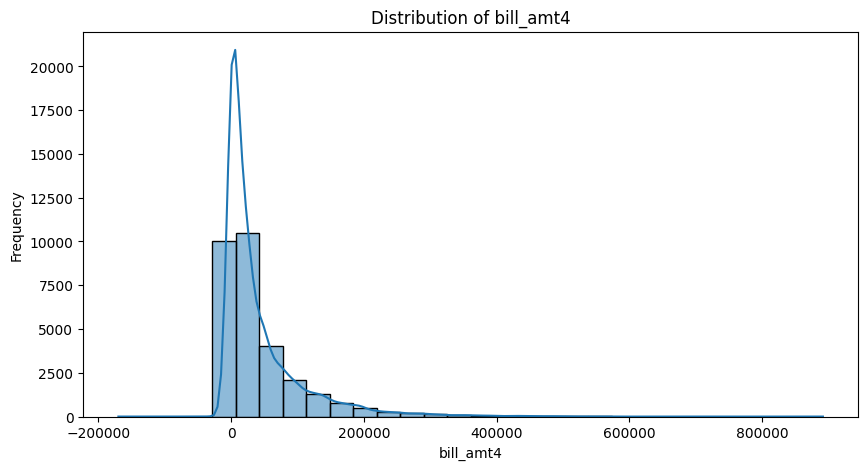

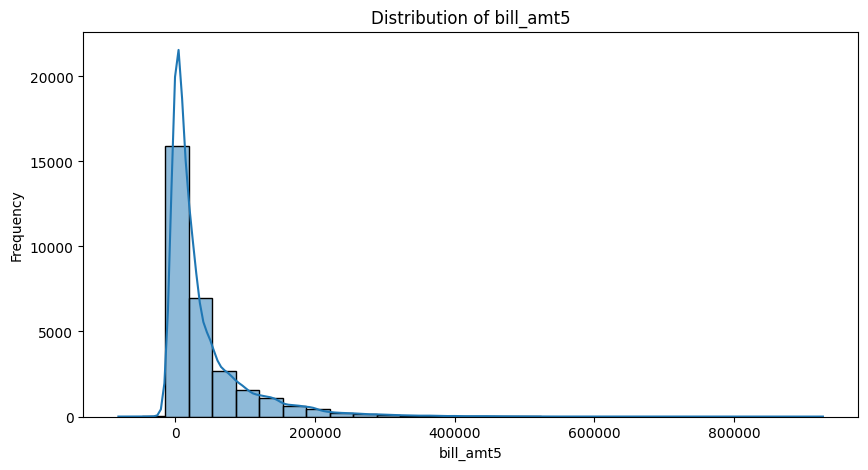

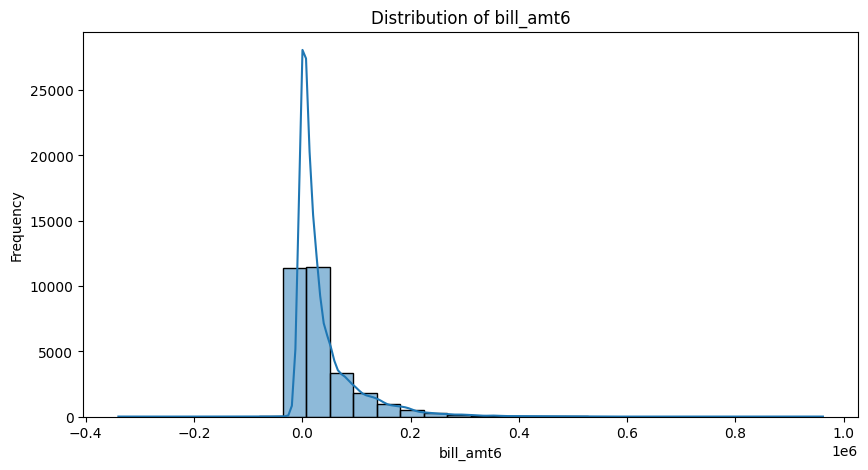

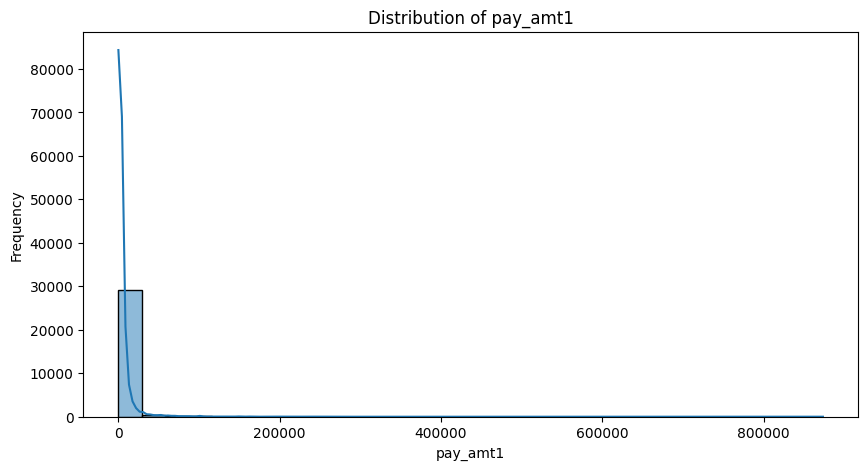

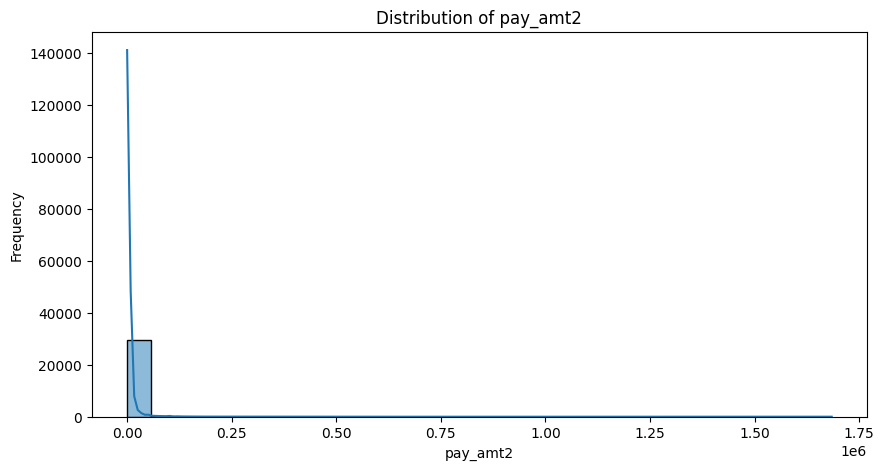

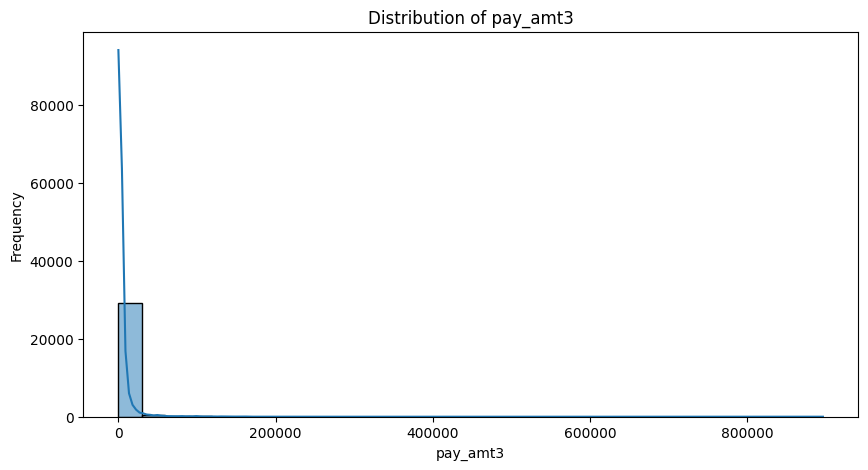

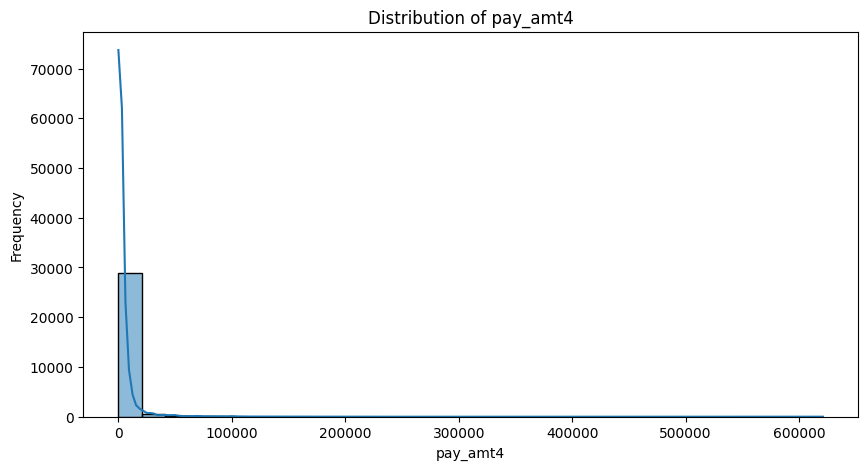

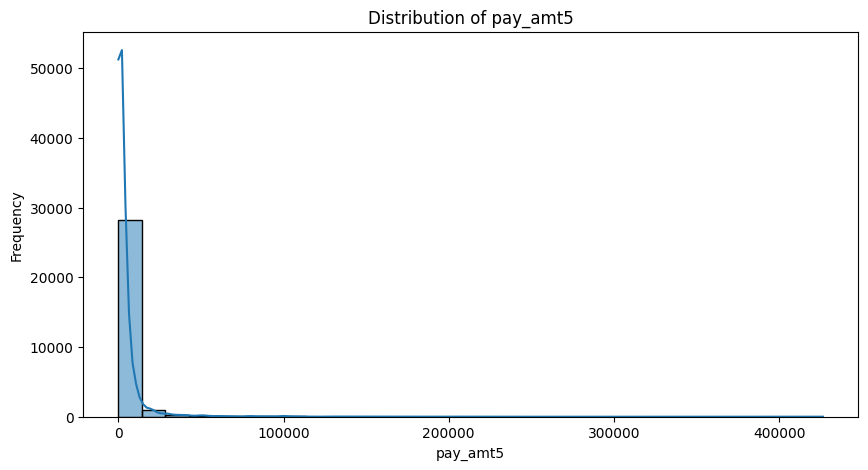

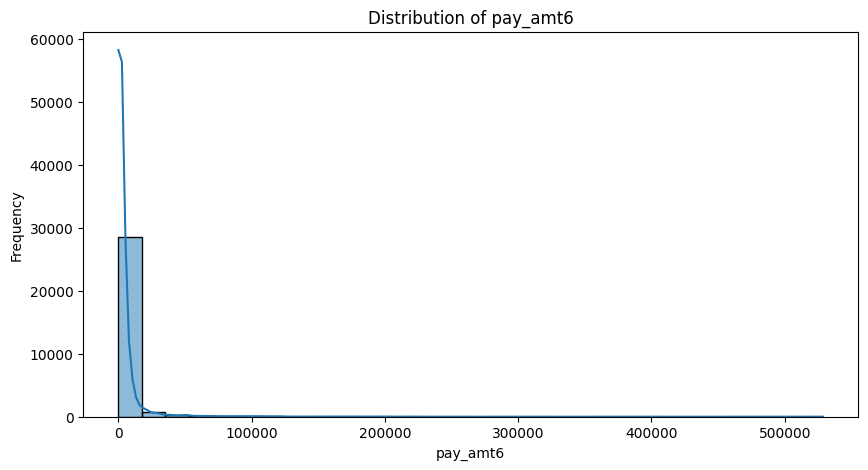

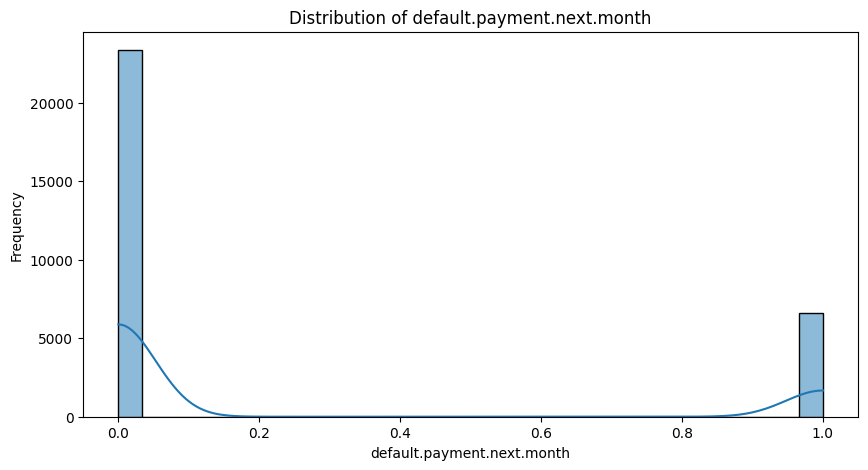

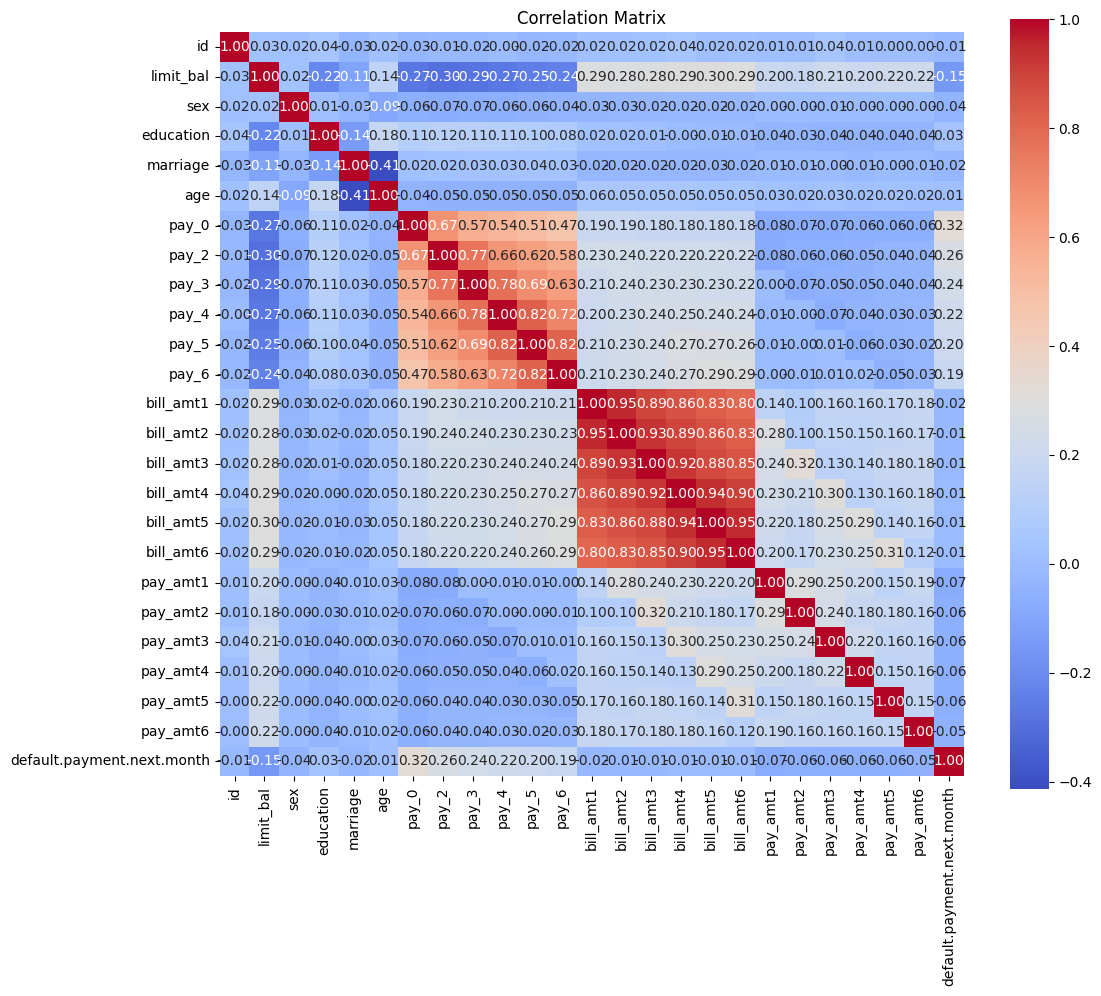

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='default.payment.next.month', data=df, palette='Set2')


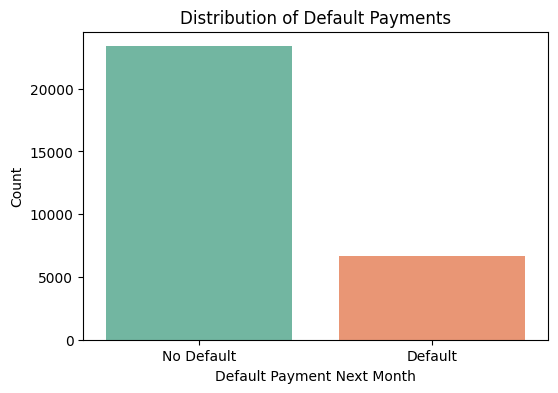

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


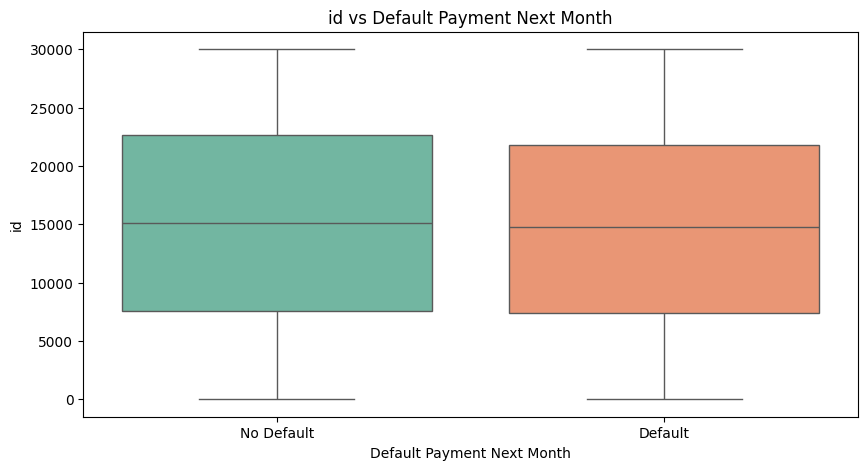

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


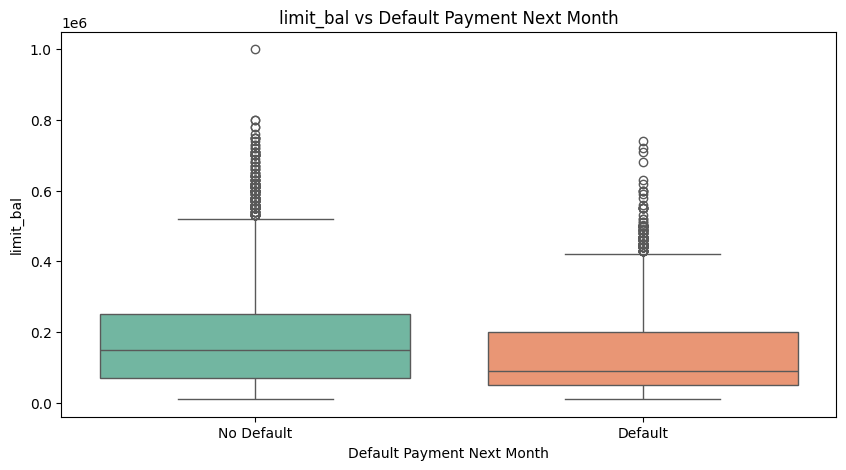

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


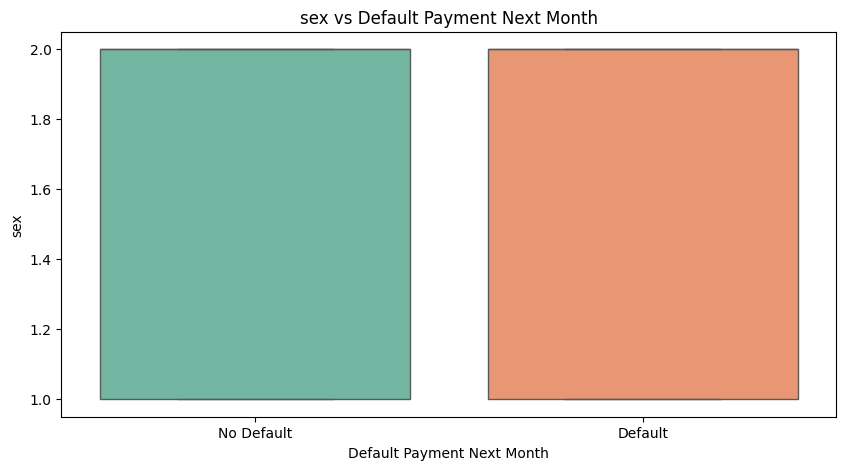

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


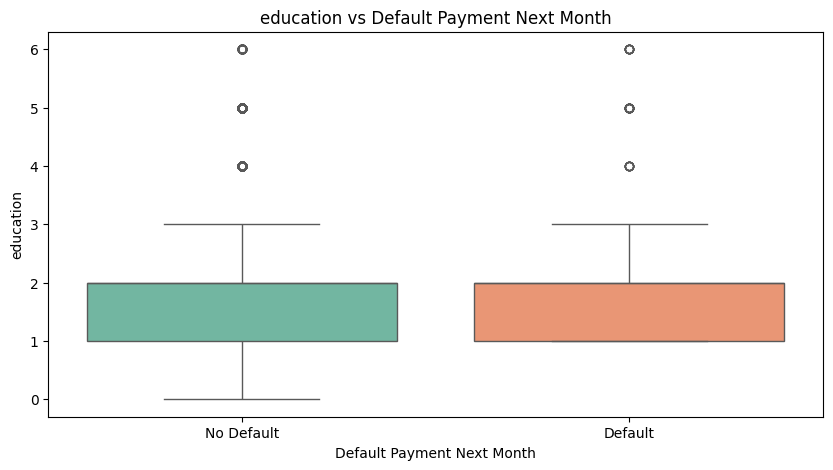

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


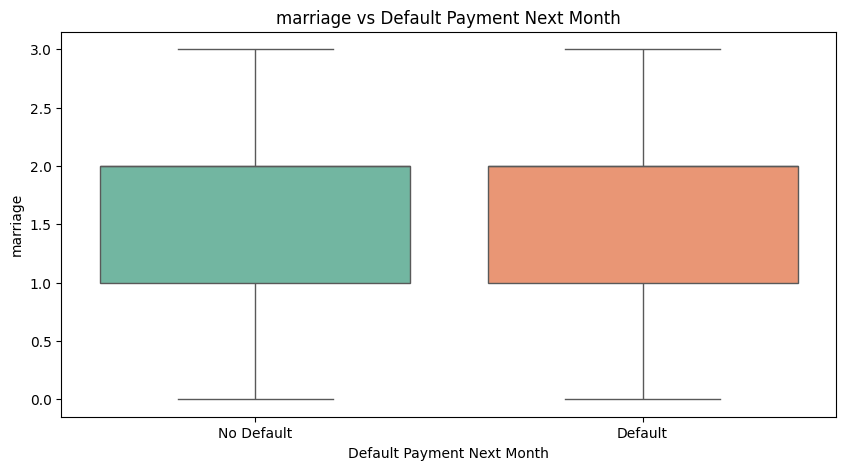

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


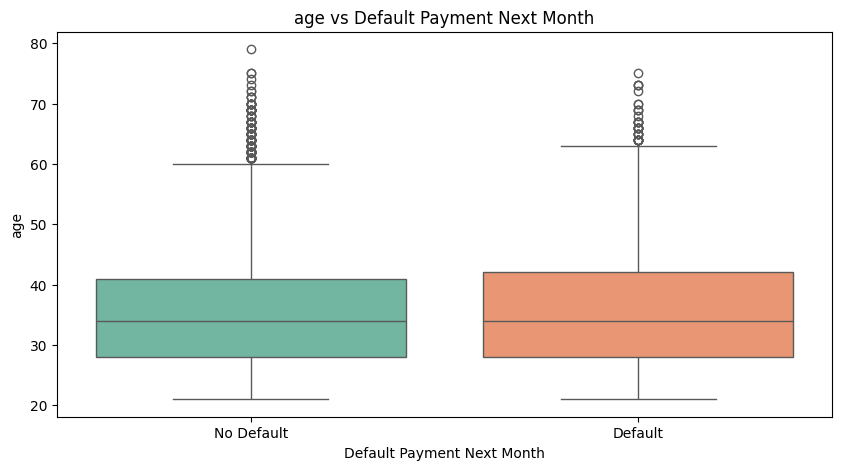

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


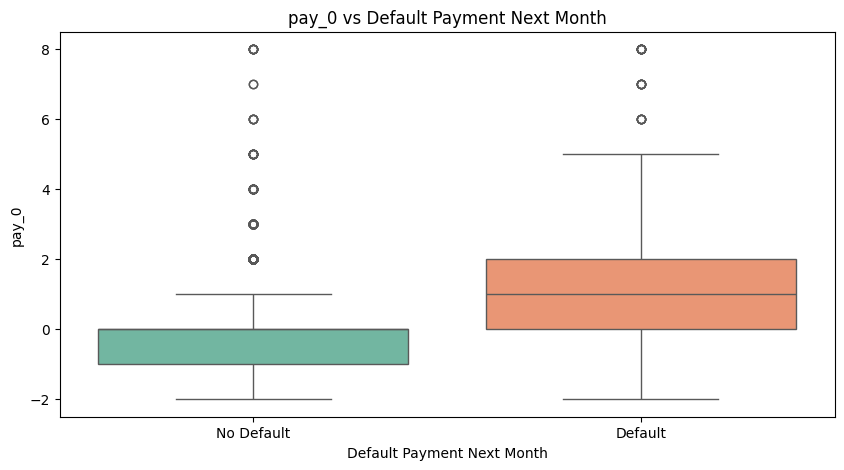

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


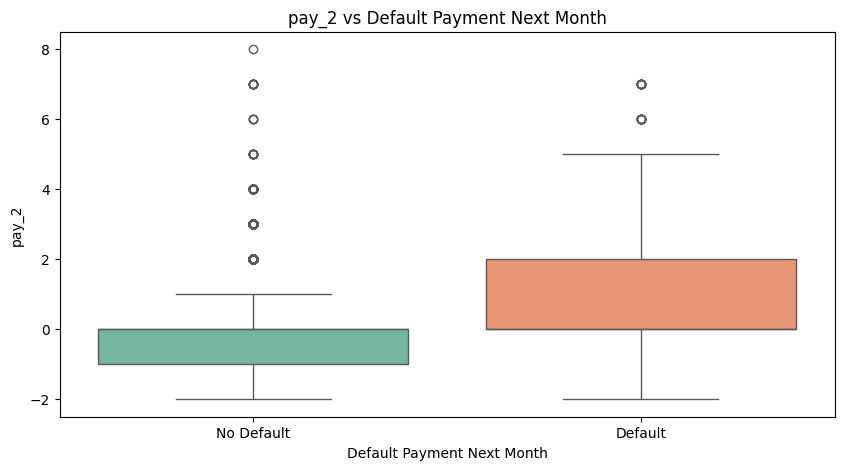

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


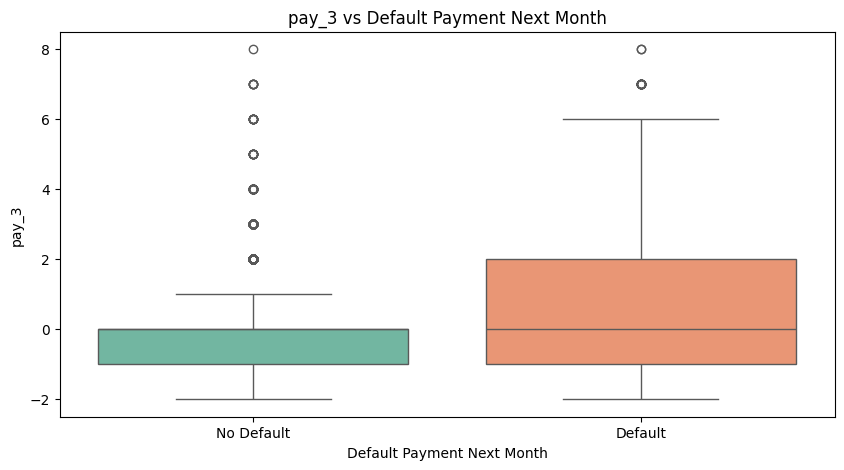

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


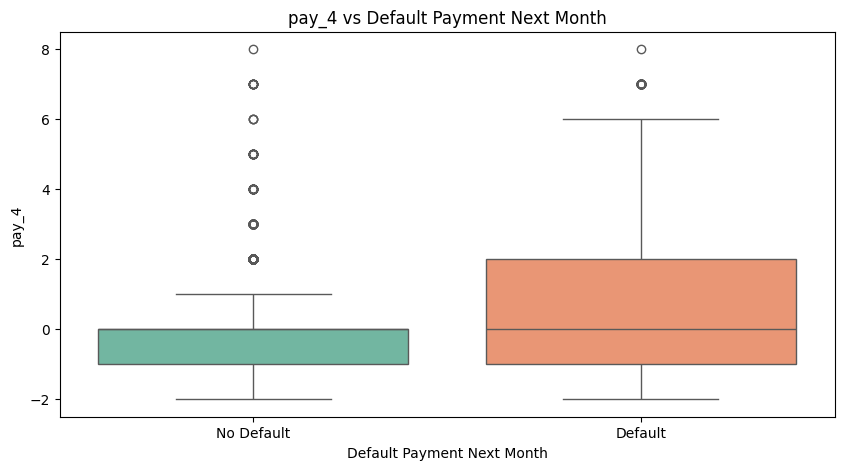

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


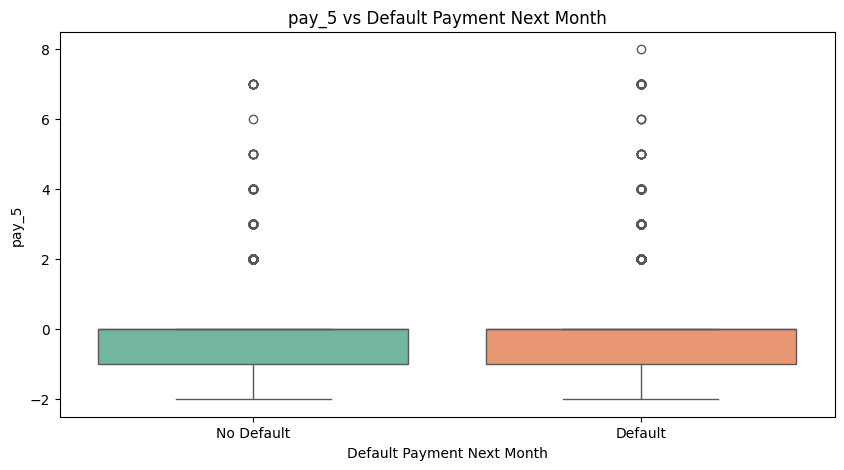

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


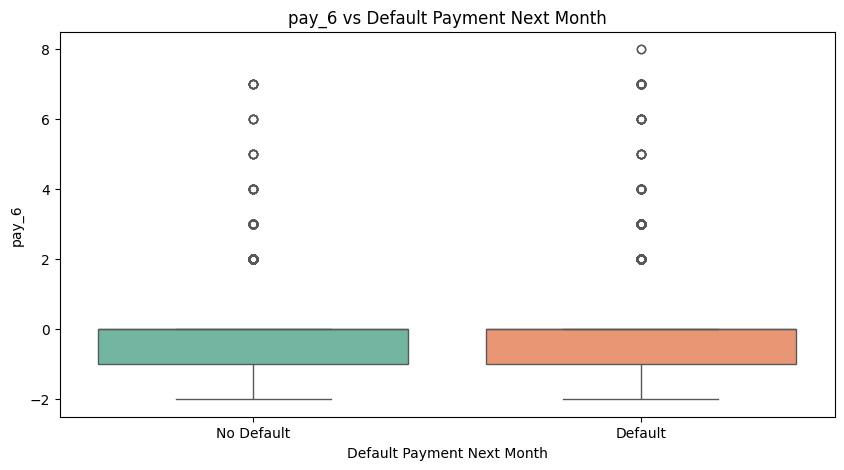

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


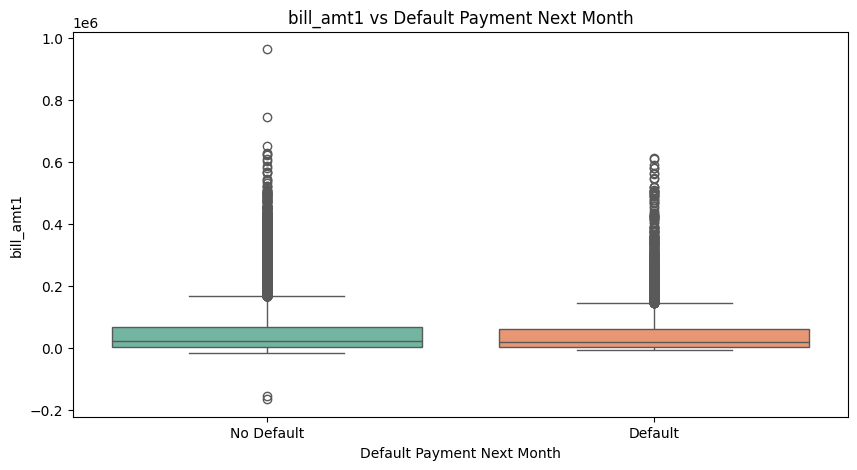

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


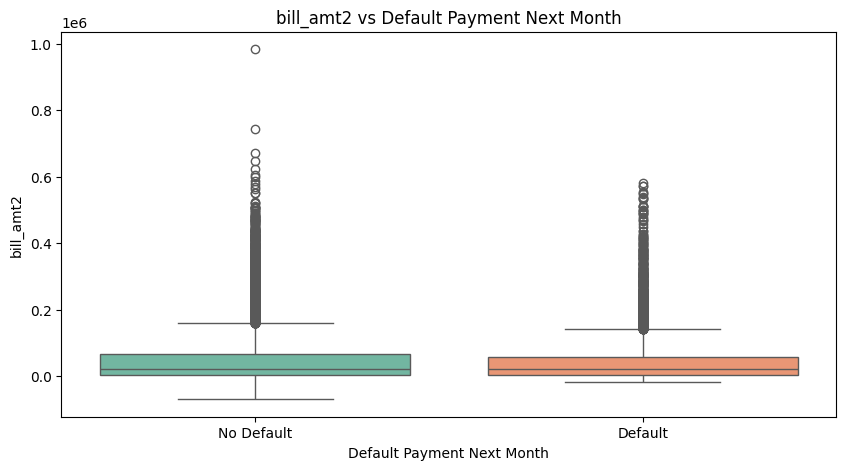

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


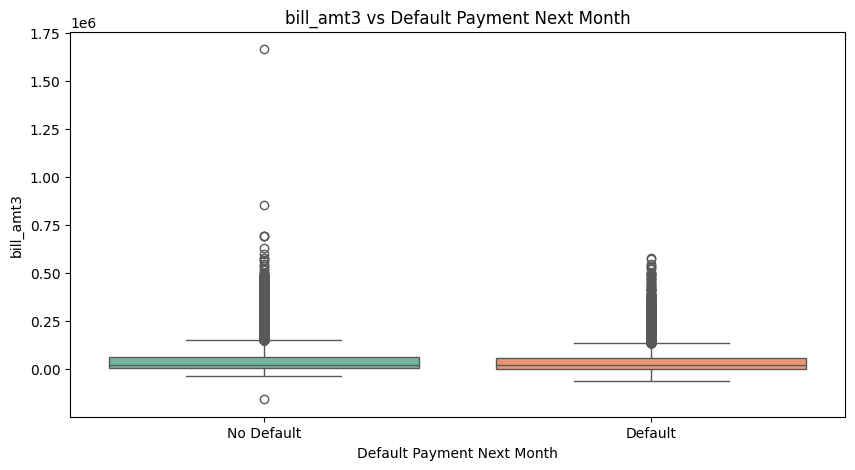

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


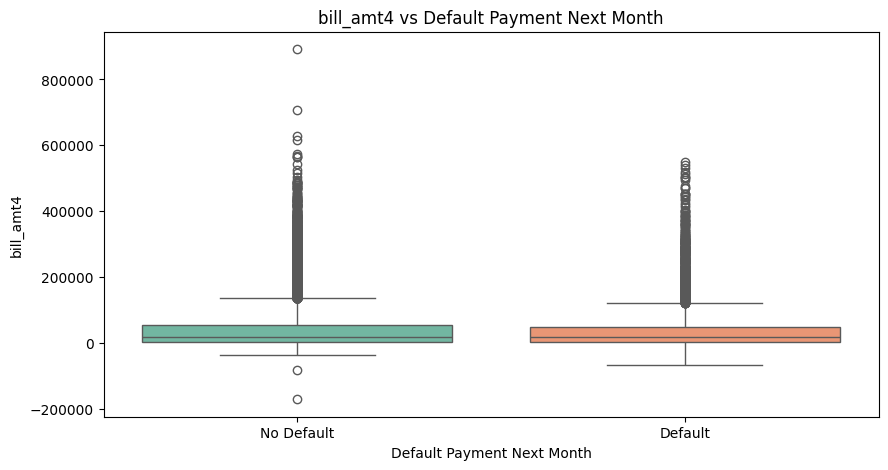

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


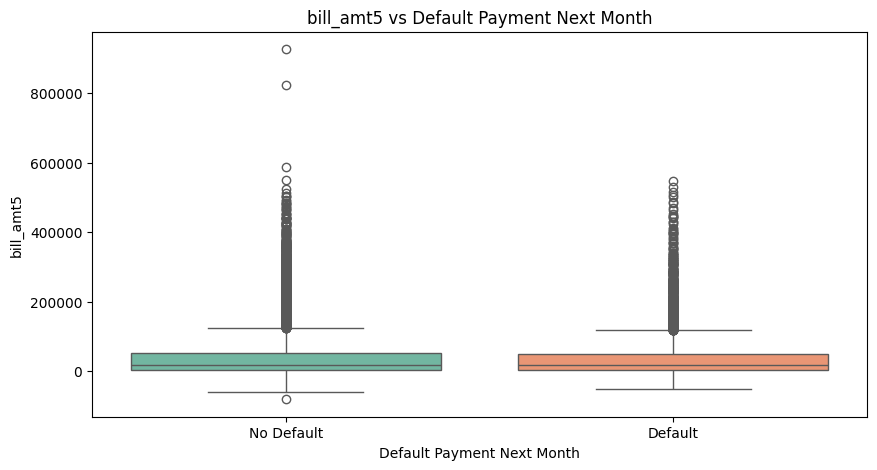

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


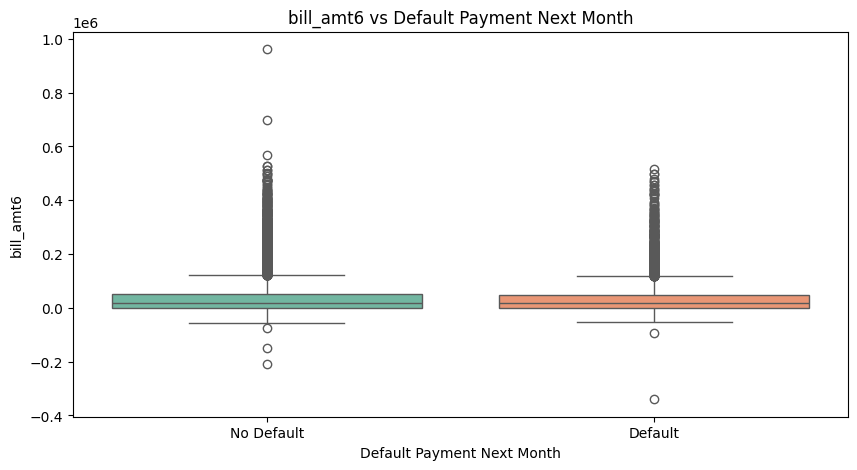

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


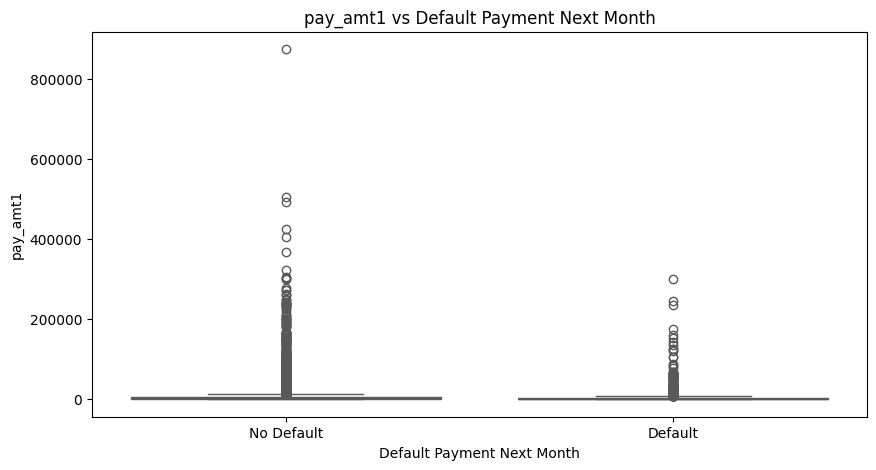

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


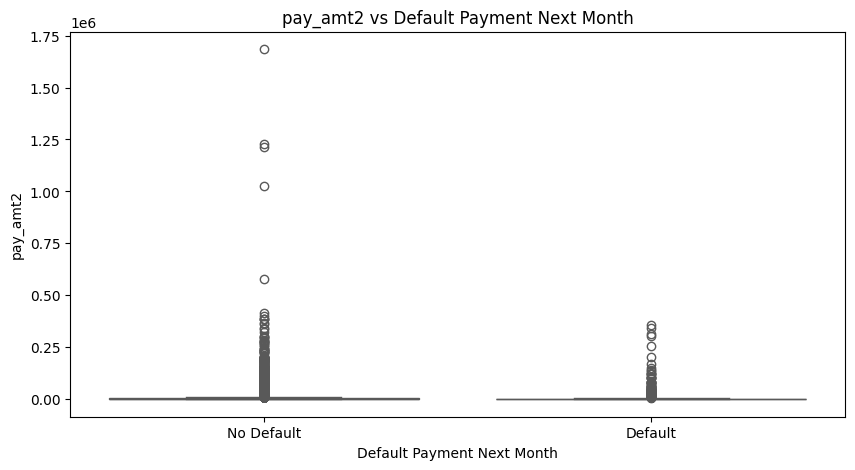

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


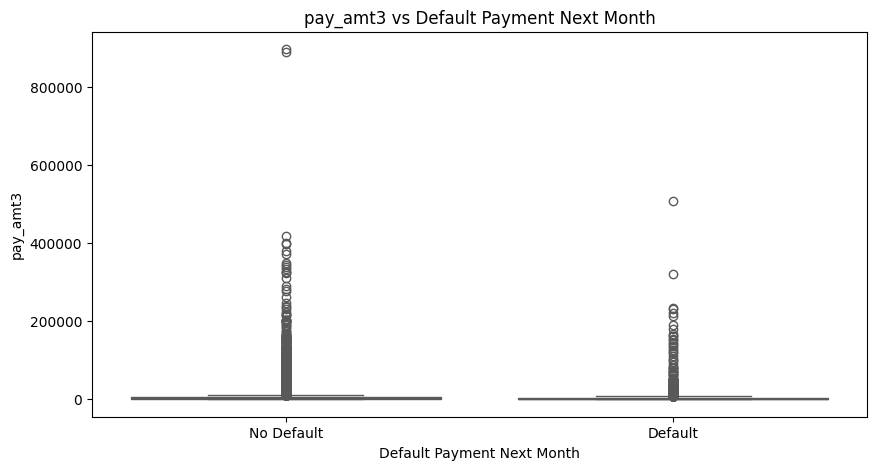

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


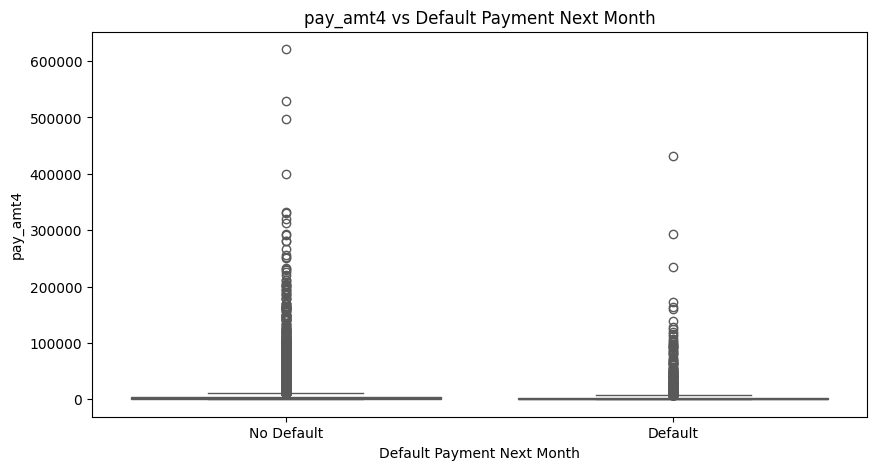

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


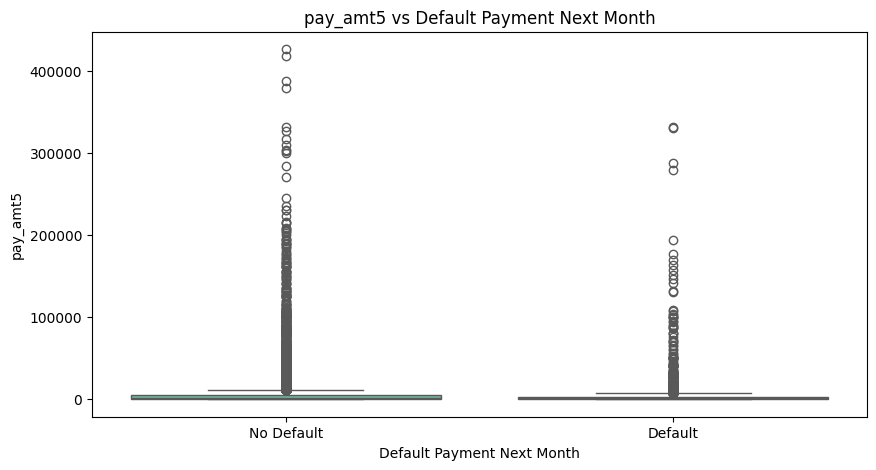

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


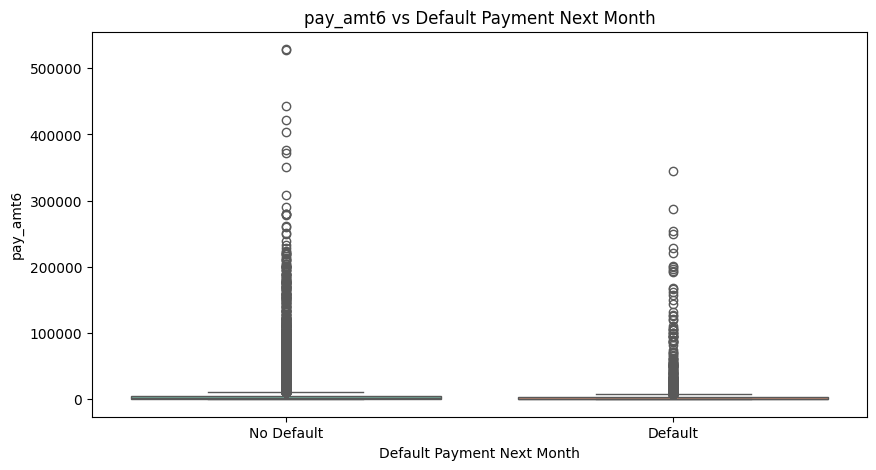

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


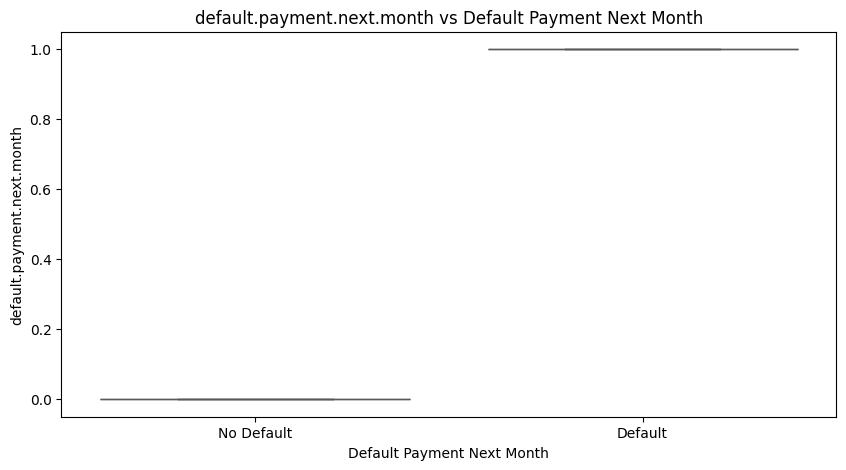

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


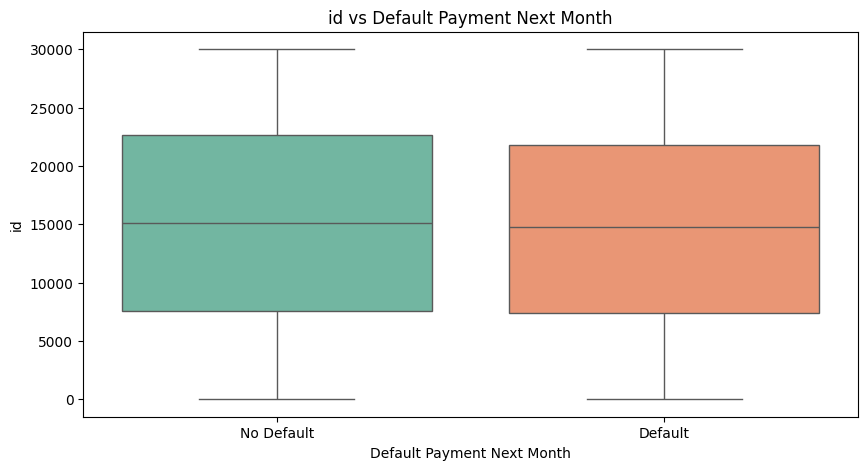

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


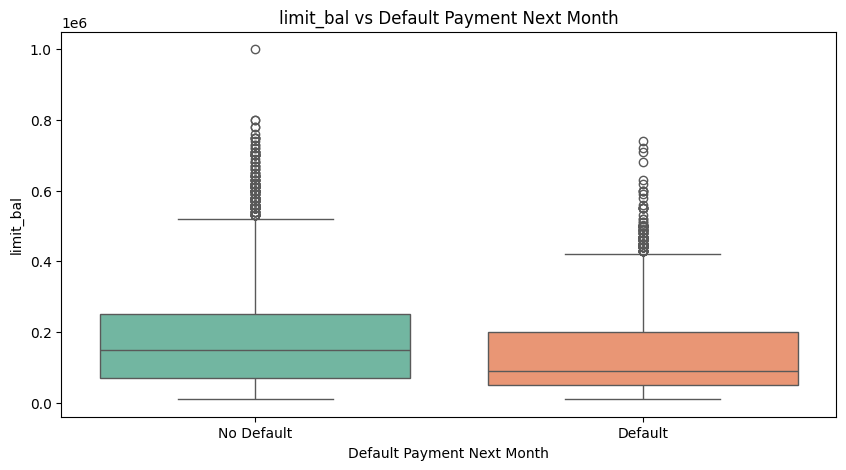

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


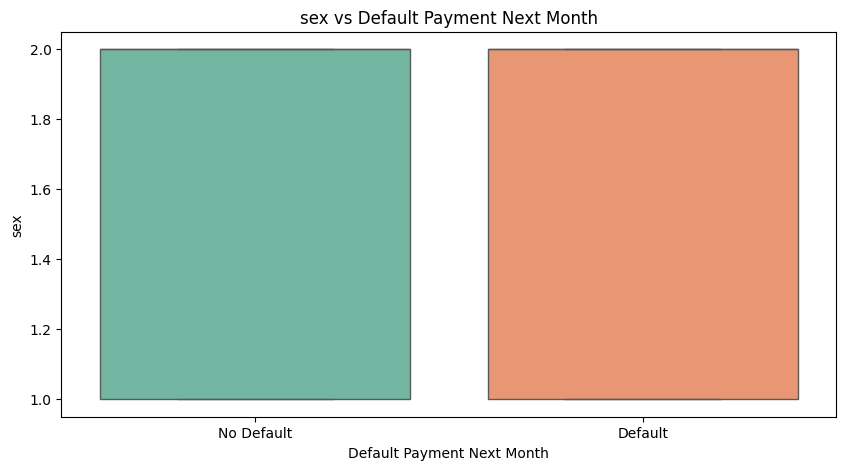

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


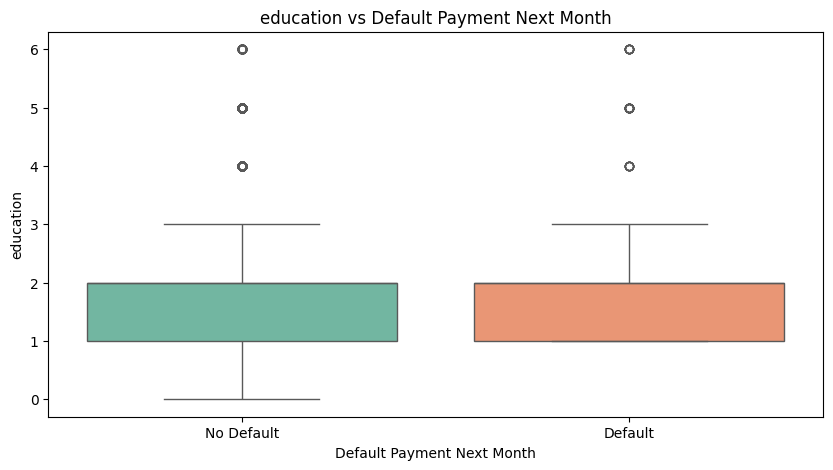

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


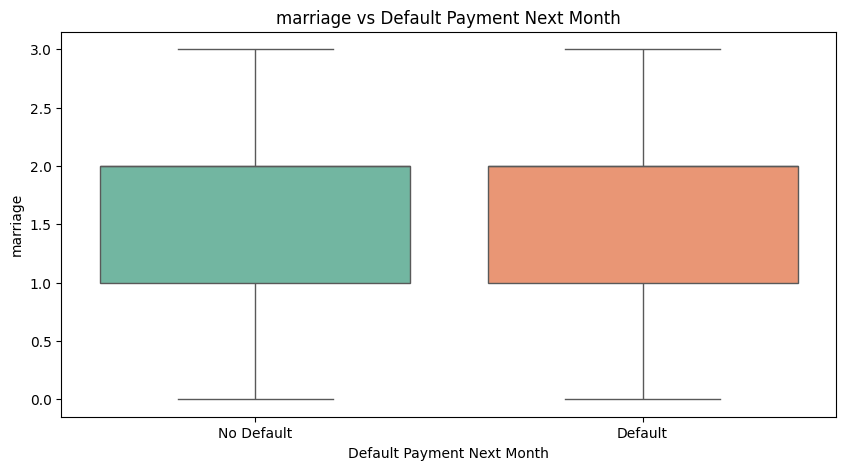

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


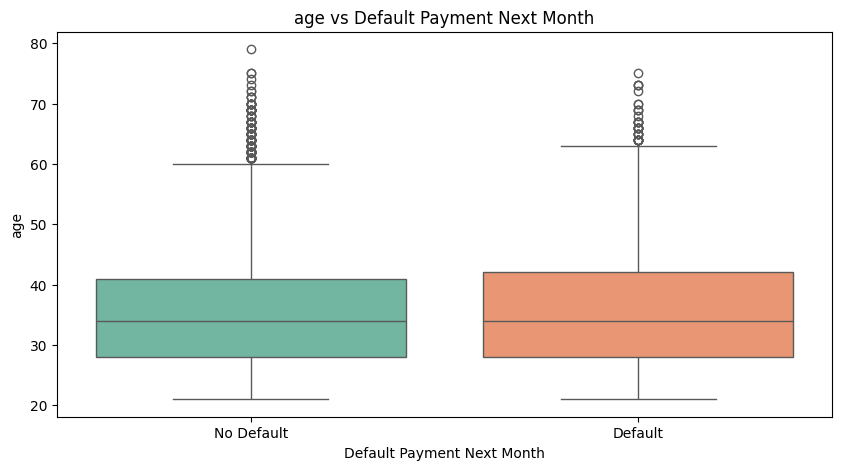

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


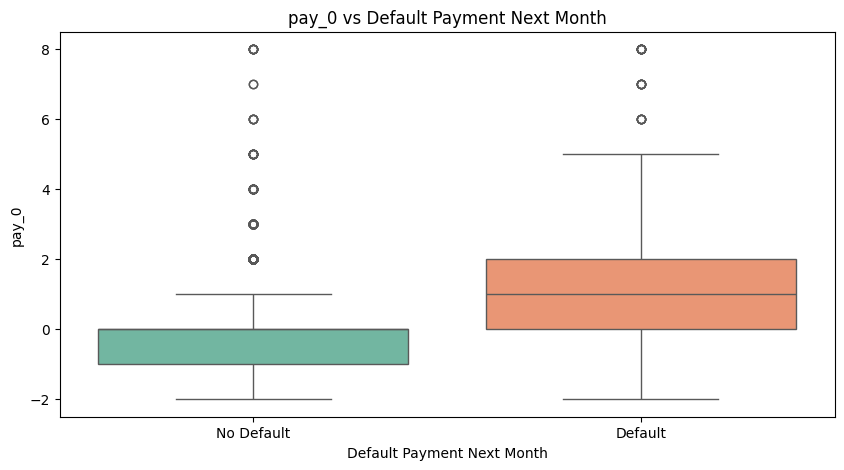

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


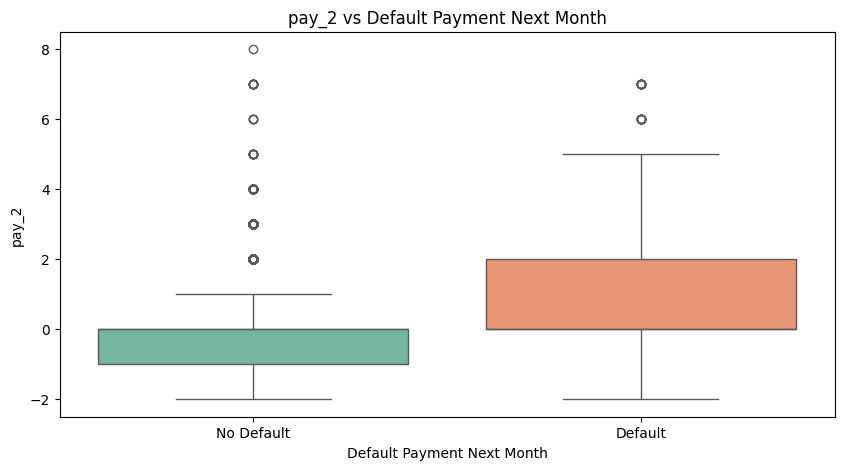

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


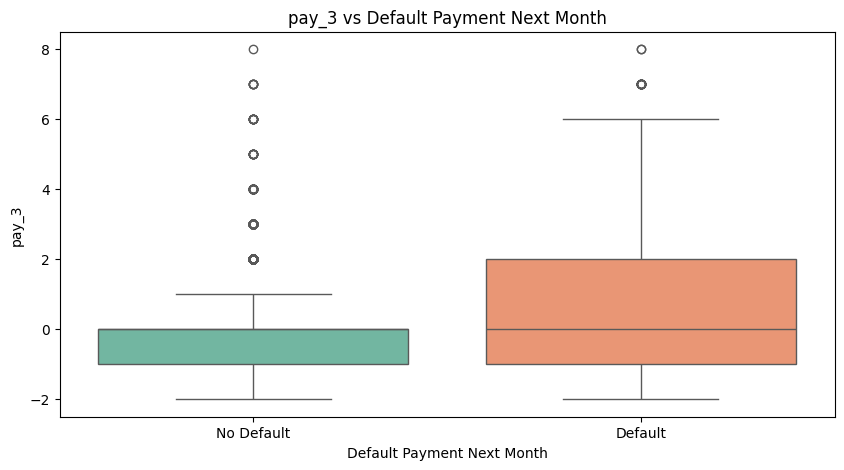

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


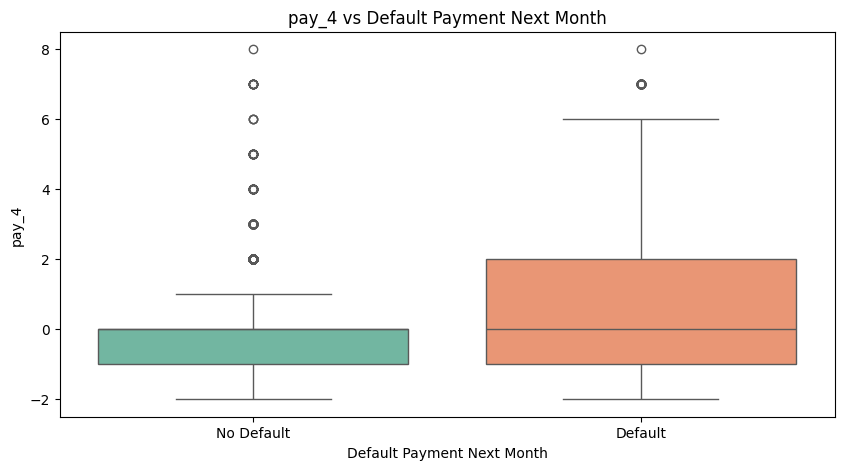

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


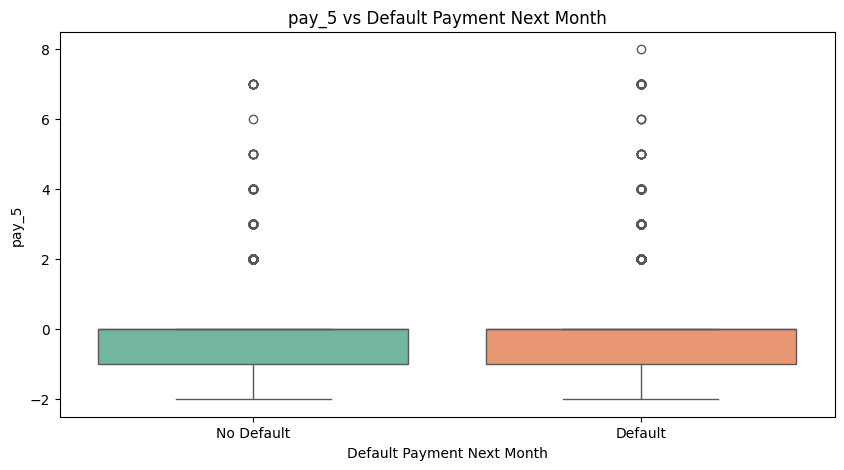

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


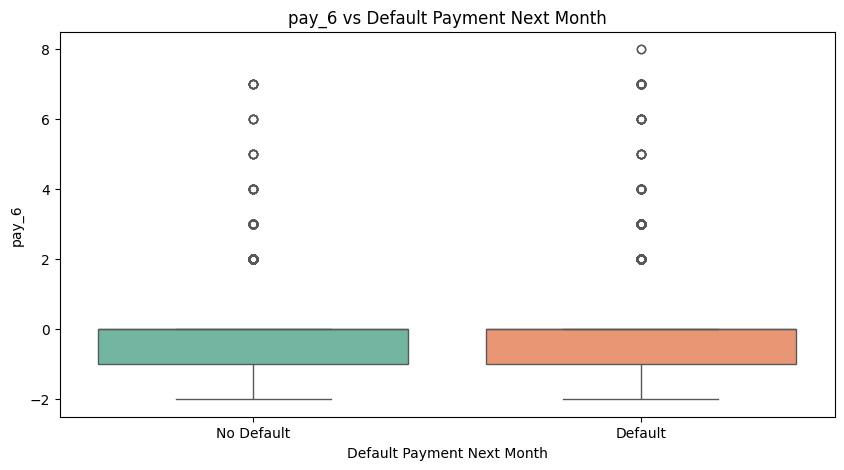

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


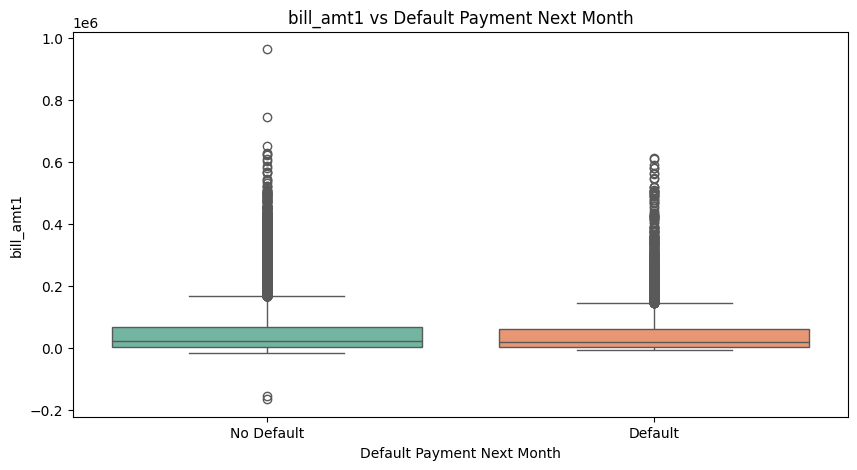

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


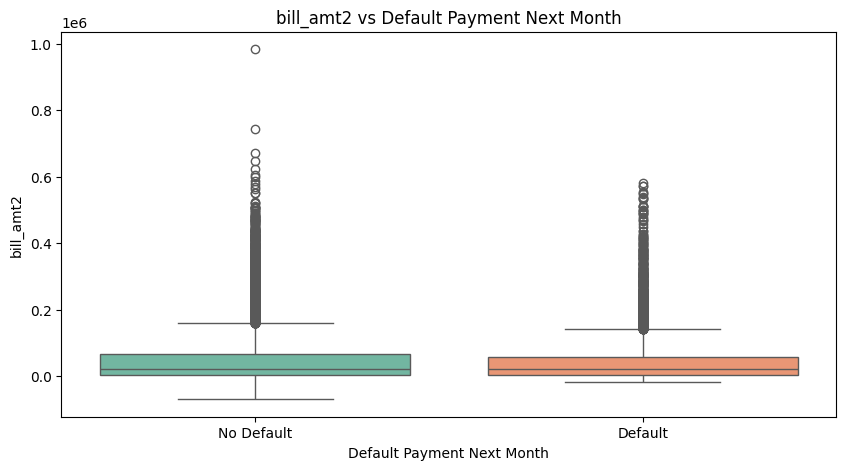

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


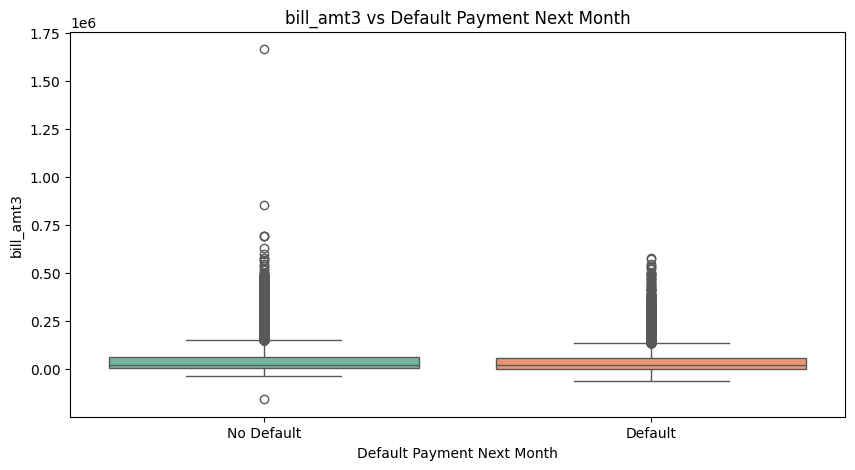

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


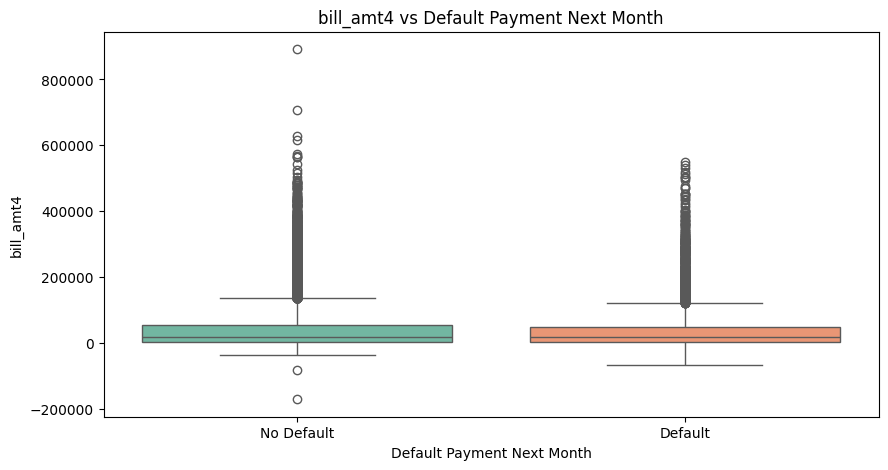

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


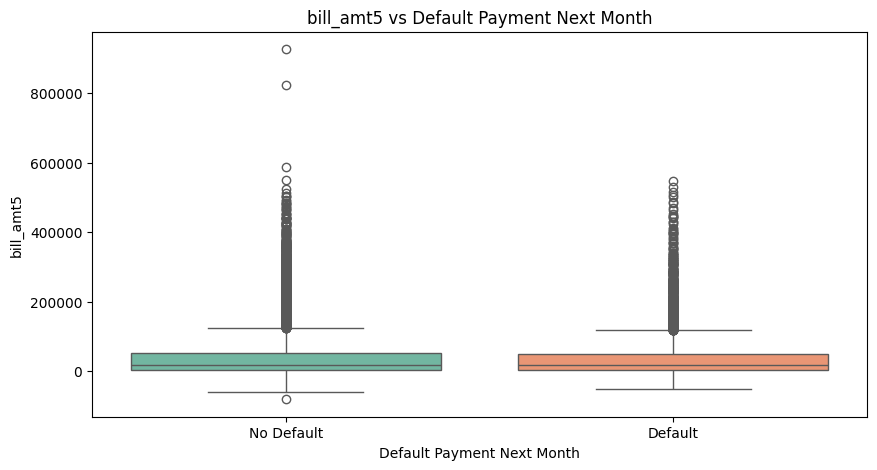

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


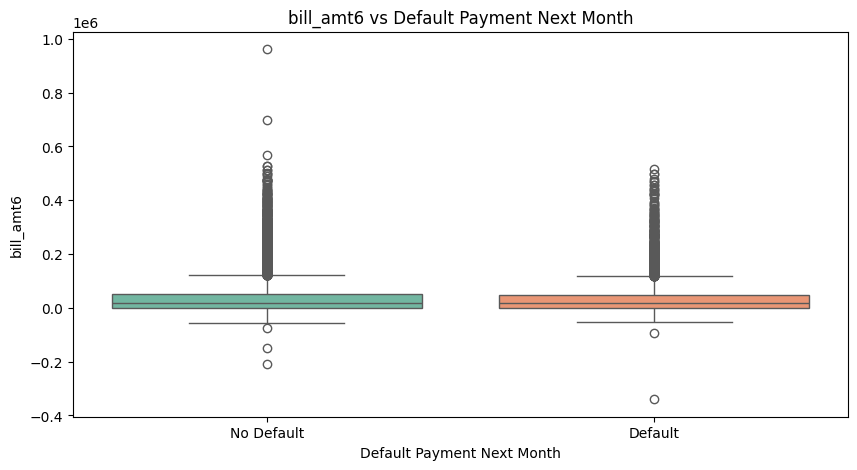

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


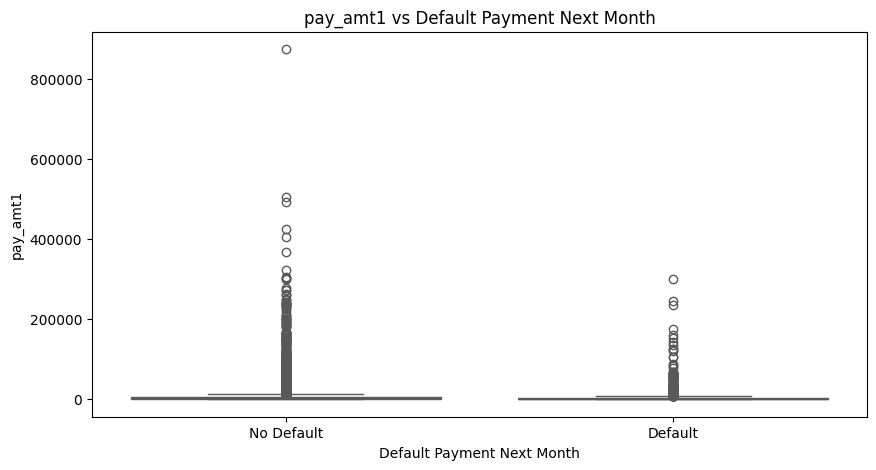

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


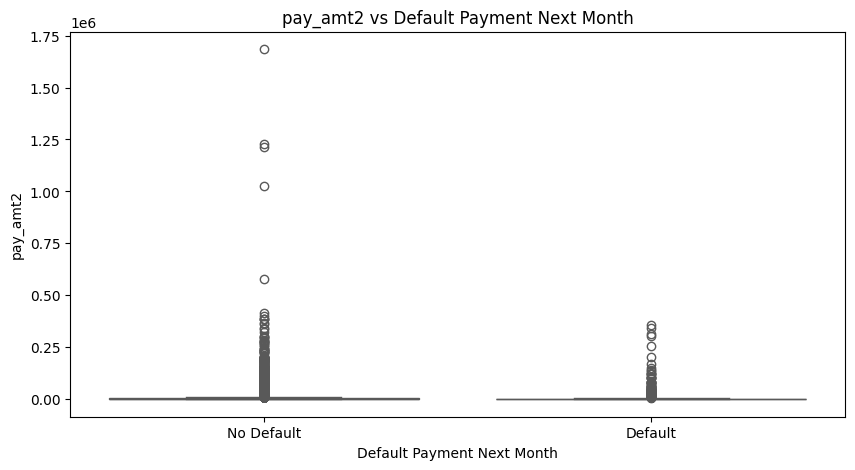

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


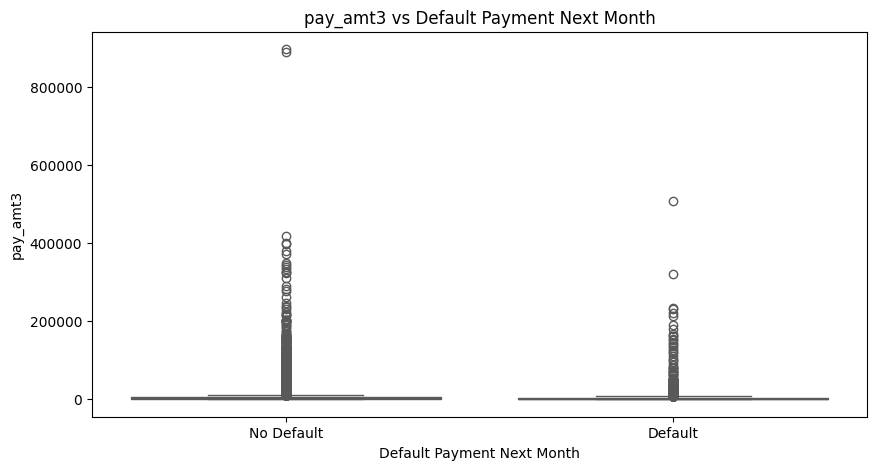

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


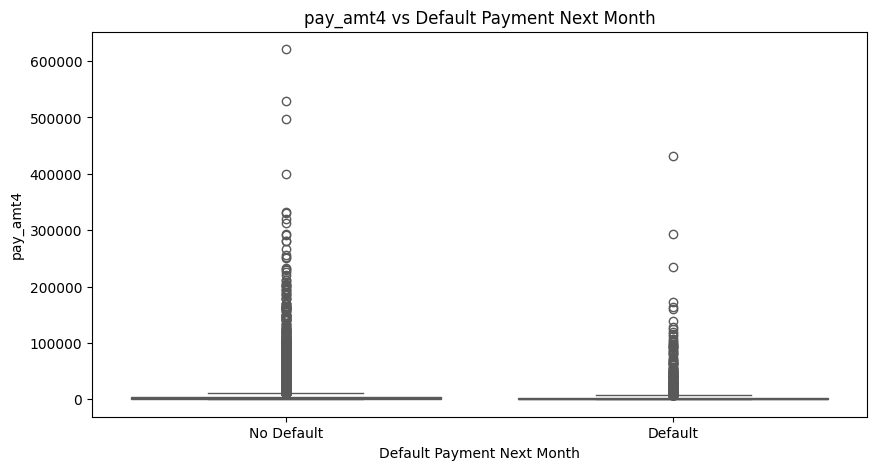

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


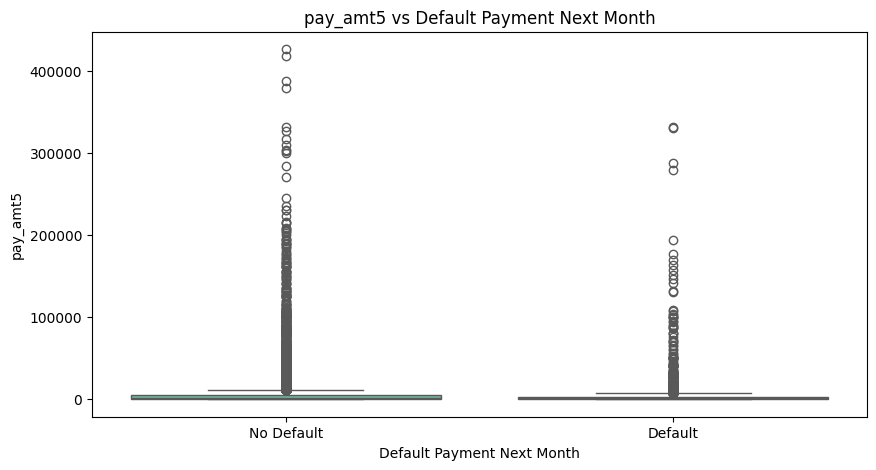

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


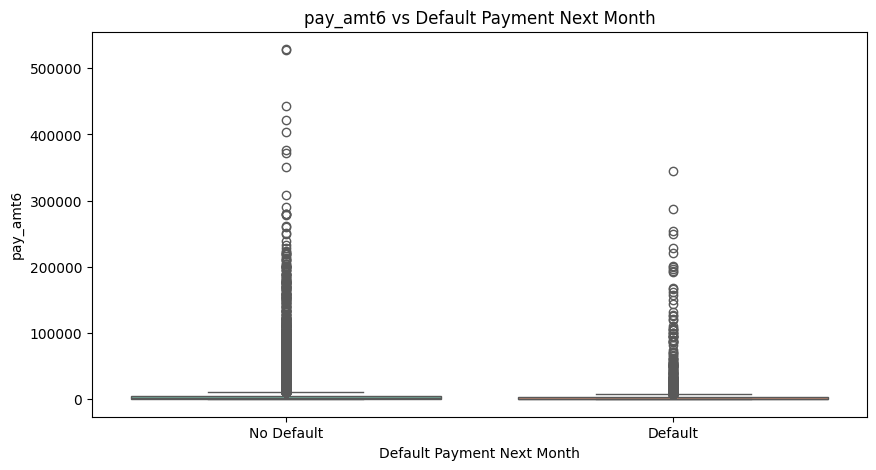

C:\Users\abdou\AppData\Local\Temp\ipykernel_15608\429800823.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')


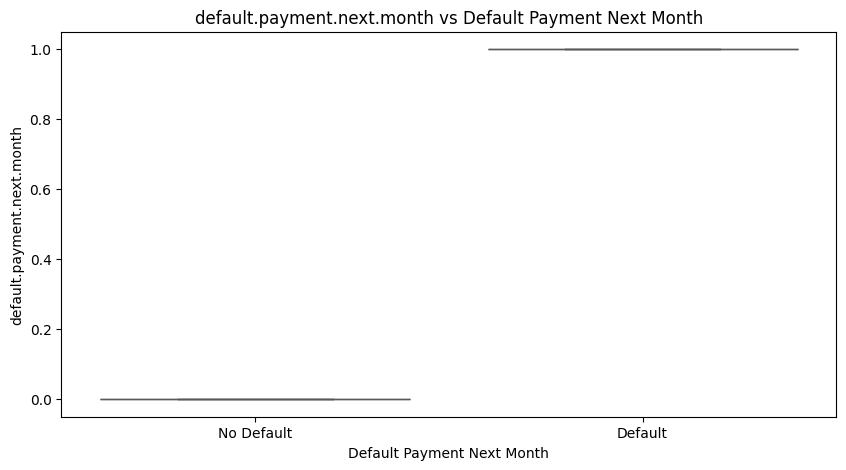

In [13]:
# Visualize the first few rows of the dataset
print(df.head())        

# Visualize the data types of each column
print(df.dtypes)

# Visualize the distribution of numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Visualize the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))    

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Visualize the target variable distribution
plt.figure(figsize=(6, 4)) 
sns.countplot(x='default.payment.next.month', data=df, palette='Set2')
plt.title('Distribution of Default Payments')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.show()

# Visualize the relationship between numerical features and the target variable
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')
    plt.title(f'{feature} vs Default Payment Next Month')
    plt.xlabel('Default Payment Next Month')
    plt.ylabel(feature)
    plt.xticks([0, 1], ['No Default', 'Default'])
    plt.show()

# Visualize the relationship between categorical features and the target variable
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, hue='default.payment.next.month', data=df, palette='Set2')
    plt.title(f'{feature} vs Default Payment Next Month')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Default Payment Next Month', loc='upper right', labels=['No Default', 'Default'])
    plt.show()

# Visualize the distribution of categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, data=df, palette='Set2')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

# Visualize the relationship between categorical features and numerical features
for feature in categorical_features:
    for num_feature in numerical_features:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=feature, y=num_feature, data=df, palette='Set2')
        plt.title(f'{num_feature} vs {feature}')
        plt.xlabel(feature)
        plt.ylabel(num_feature)
        plt.xticks(rotation=45)
        plt.show()

# Visualize the relationship between categorical features and the target variable
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, hue='default.payment.next.month', data=df, palette='Set2')
    plt.title(f'{feature} vs Default Payment Next Month')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Default Payment Next Month', loc='upper right', labels=['No Default', 'Default'])
    plt.xticks(rotation=45)
    plt.show()

# Visualize the relationship between numerical features and the target variable
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='default.payment.next.month', y=feature, data=df, palette='Set2')
    plt.title(f'{feature} vs Default Payment Next Month')
    plt.xlabel('Default Payment Next Month')
    plt.ylabel(feature)
    plt.xticks([0, 1], ['No Default', 'Default'])
    plt.show()
